# Data Cleaning and Preprocessing before Analysis Data

#  Introduction:


## Notebook: Stock Market Data Cleaning and Preprocessing
### Introduction
In this notebook, the primary objective is to conduct data cleaning and preprocessing on a stock market dataset. The ultimate goal is to prepare the data for subsequent analysis and visualization stages. This initial step sets the foundation for a multi-part analysis of the stock market, where the cleaned dataset will be utilized in exploratory data analysis (EDA) and modeling tasks.

#### Techniques Employed
1. Z-score Normalization: Utilized to address outliers within the dataset, ensuring that extreme values do not unduly influence subsequent analysis.
2. Missing Data Imputation: Employed to handle missing values within the dataset, ensuring that incomplete data points do not hinder the analysis.
3. Column Removal: Unnecessary columns will be identified and removed from the dataset to streamline the data and enhance readability.
4. Column Renaming: Columns will be renamed to improve clarity and comprehension of the dataset.

Steps Overview
#### Data Loading: Load the raw stock market dataset.
1. Data Cleaning:
Handle outliers using z-score normalization.
Implement missing data imputation techniques.
Remove unnecessary columns.
Rename columns for improved readability.
2. Data Preprocessing: Perform any additional preprocessing steps required to ensure the data is ready for subsequent analysis.
3. Data Saving: Save the cleaned dataset for future use in exploratory data analysis and modeling.
By the conclusion of this notebook, we will have a clean and well-prepared dataset ready for further analysis and exploration of the stock market data.

In [1]:
import pandas as pd

In [2]:
# reading in dataset
data = pd.read_csv("C:/Users/hasan/OneDrive/Desktop/DS/final project/dataset/all_stocks_5yr.csv")

In [3]:
# displaying first 5 rows of data
print(data.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [4]:
# checking data types of columns
print(data.dtypes)


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


#  Data preparation

#  Missing values

In [5]:
# checking for missing values
print(data.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In this scenario, the discovery of only 11 missing values in the 'open' column, 8 in the 'high' column, and 8 in the 'low' column out of a dataset containing approximately 690,000 observations suggests a negligible proportion of missing data. Given the minimal impact on the dataset's representativeness, it is indeed reasonable to opt for removing these rows.

By eliminating the rows with missing values, the analysis benefits from a dataset that is complete and accurate, enhancing the reliability and validity of the results derived from subsequent analyses. This approach ensures that the conclusions drawn from the dataset are based on robust data, thus increasing the confidence in the findings.

Removing such a small fraction of observations helps maintain the integrity of the dataset while mitigating potential biases that could arise from imputing missing values or altering the dataset structure. Consequently, the decision to remove these rows aligns with the objective of conducting analyses based on high-quality, comprehensive data.

In [6]:
# droping the rows with missing values of daily_return
data.dropna(inplace=True)

In [7]:
# checking for duplicate rows
duplicate_rows = data.duplicated()
print(duplicate_rows.sum())


0


In [8]:
# droping duplicate rows
data.drop_duplicates(inplace=True)


#  Outliers

#  Visualsing the outliers

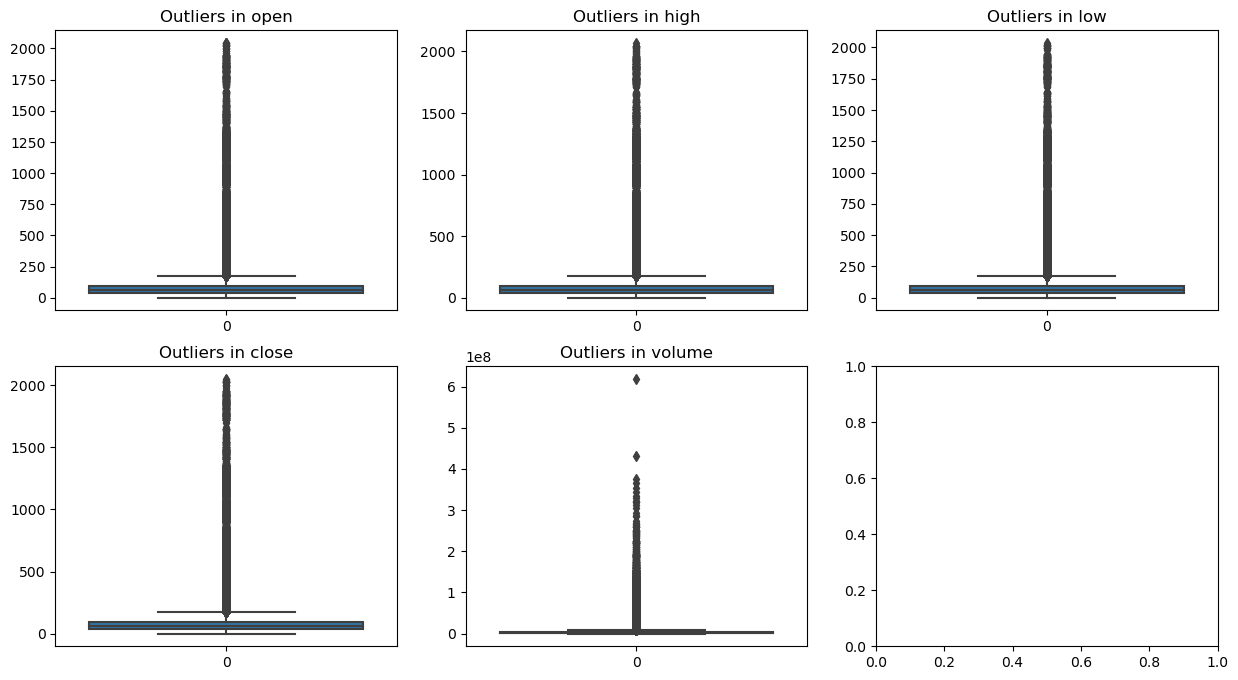

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Creating a counter to keep track of the current subplot
counter = 0
data_without_name = data.drop(columns=["Name","date"])

# Iterating through all columns of the dataframe
for column in data_without_name.columns:
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(data[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1

# Showing the plot
plt.show()



#  IQR method

The IQR method, also known as the Tukey method, is a method for identifying outliers in a dataset. It is based on the interquartile range, which is the difference between the 75th and 25th percentiles of the dataset. Data points that are outside of the range of 1.5IQR to 3IQR are considered outliers.

In [10]:
# Calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\hasan\AppData\Local\Temp\ipykernel_17952\1846016034.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\hasan\AppData\Local\Temp\ipykernel_17952\1846016034.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\hasan\AppData\Local\Temp\ipykernel_17952\1846016034.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [11]:
df_out

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL
10,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


#   z-score method

The z-score method is a statistical method for identifying outliers in a dataset. It calculates the difference between each data point and the mean of the dataset, in terms of the standard deviation of the dataset. Data points that have a z-score greater than a certain threshold (typically 3 or -3) are considered outliers.

I am creating a new feature in the dataset called 'daily_return'. The feature is calculated by taking the percentage change of the 'close' column. The percentage change, also known as the relative change, is a common method used to measure the change in a value over time. It is calculated by subtracting the previous value from the current value, and then dividing by the previous value. By taking the percentage change of the 'close' column, I am able to measure the daily return of the stock, which can be useful for understanding the volatility and performance of the stock over time. This feature can be useful for further analysis, such as identifying trends or patterns in the stock's performance, or for evaluating the risk and return of the stock relative to other stocks or benchmarks.

#  Data consistency

In [3]:
# Checking that all dates are in the correct format
if not data['date'].str.match('\d{4}-\d{2}-\d{2}').all():
    print("Incorrect date format detected in the dataset.")
else: 
    print("NO Incorrect date format detected in the dataset.")

NO Incorrect date format detected in the dataset.


Checking that the volume of shares traded is not negative by using the .any() function to check if there are any negative values in the 'volume' column of the dataframe. 

In [4]:
# Checking that the volume of shares traded is not negative
if (data['volume'] < 0).any():
    print("Negative volume detected in the dataset.")
else: 
    print("NO Negative volume detected in the dataset.")

NO Negative volume detected in the dataset.


I am normalizing the 'close' and 'volume' columns by using standardization method, which makes the values of these columns have a mean of 0 and a standard deviation of 1. This makes data more comparable and consistent, which can help improve the accuracy and reliability of my analysis.

In [5]:
# normalizing the close and volume columns
data['close'] = (data['close'] - data['close'].mean()) / data['close'].std()
data['volume'] = (data['volume'] - data['volume'].mean()) / data['volume'].std()

#  Correlation

The correlation matrix is a square matrix where the diagonal elements are always 1 (because a variable is perfectly correlated with itself) and the off-diagonal elements are between -1 and 1. Positive values indicate a positive correlation, meaning that as one variable increases, the other variable also increases. Negative values indicate a negative correlation, meaning that as one variable increases, the other variable decreases. The closer the correlation coefficient is to 1 or -1, the stronger the correlation.

C:\Users\hasan\AppData\Local\Temp\ipykernel_18012\2454154816.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

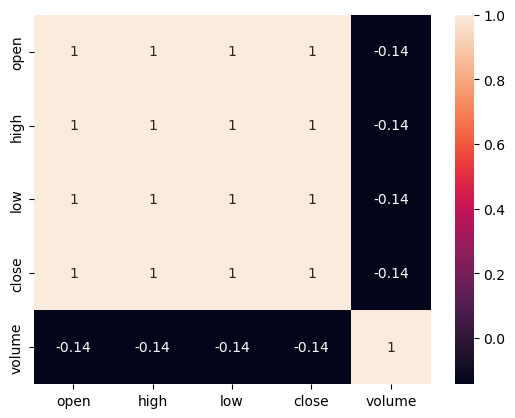

In [6]:
import seaborn as sns
corr = data.corr()

sns.heatmap(corr, annot=True)

#  Feature engineering Create additional features

In [7]:
# Setting date column as index
data.set_index('date', inplace=True)

# Printing the columns after setting the index
print(data.columns)



Index(['open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [8]:
print(data.index)


Index(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14',
       '2013-02-15', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22',
       ...
       '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
       '2018-02-01', '2018-02-02', '2018-02-05', '2018-02-06', '2018-02-07'],
      dtype='object', name='date', length=619040)


'price_change': This feature calculates the difference between the closing price and the opening price for a given day, and can be used to determine the overall change in price for that day.

In [9]:
print(data.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [10]:

#Create a new feature 'price_change'
data['price_change'] = data['close'] - data['open']

'returns': This feature calculates the percentage change in the closing price from one day to the next, and can be used to determine the overall change in price over time.

In [11]:
#Create a new feature 'returns'
data['returns'] = data['close'].pct_change()

'average_price': This feature calculates the average of the opening and closing prices for a given day, and can be used as a general indicator of the average price for that day.

In [12]:
#Create a new feature 'average_price'
data['average_price'] = (data['close'] + data['open']) / 2

'price_range': This feature calculates the difference between the highest and lowest prices for a given day, and can be used to determine the overall range of prices for that day.

In [13]:
#Create a new feature 'price_range'
data['price_range'] = data['high'] - data['low']

'volume_change': This feature calculates the difference in trading volume from one day to the next, and can be used to determine the overall change in trading volume over time.

In [14]:
#Create a new feature 'volume_change'
data['volume_change'] = data['volume'].diff()

'price_volume_correlation': This feature calculates the correlation coefficient between the closing price and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [15]:
#Create a new feature 'price_volume_correlation'
data['price_volume_correlation'] = data['close'].corr(data['volume'])

'returns_volume_correlation': This feature calculates the correlation coefficient between the returns and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [16]:
#Create a new feature 'returns_volume_correlation'
data['returns_volume_correlation'] = data['returns'].corr(data['volume'])

'price_volume_covariance': This feature calculates the covariance between the closing price and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [17]:
#Create a new feature 'price_volume_covariance'
data['price_volume_covariance'] = data['close'].cov(data['volume'])

'returns_volume_covariance': This feature calculates the covariance between the returns and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [18]:
#Create a new feature 'returns_volume_covariance'
data['returns_volume_covariance'] = data['returns'].cov(data['volume'])

'moving_average_5', 'moving_average_10', 'moving_average_20': These features calculate the moving average of the closing price over the previous 5, 10 and 20 days respectively, and can be used as indicators of the overall trend in the closing price over time.

In [19]:
#Create a new feature 'moving_average_5'
data['moving_average_5'] = data['close'].rolling(window=5).mean()

In [20]:
#Create a new feature 'moving_average_10'
data['moving_average_10'] = data['close'].rolling(window=10).mean()

In [21]:
#Create a new feature 'moving_average_20'
data['moving_average_20'] = data['close'].rolling(window=20).mean()

'exponential_moving_average_5', 'exponential_moving_average_10', 'exponential_moving_average_20': These features calculate the exponential moving average of the closing price over the previous 5, 10 and 20 days respectively, and can be used as indicators of the overall trend in the closing price over time.

In [22]:
#Create a new feature 'exponential_moving_average_5'
data['exponential_moving_average_5'] = data['close'].ewm(span=5).mean()

In [23]:
#Create a new feature 'exponential_moving_average_10'
data['exponential_moving_average_10'] = data['close'].ewm(span=10).mean()

In [24]:
#Create a new feature 'exponential_moving_average_20'
data['exponential_moving_average_20'] = data['close'].ewm(span=20).mean()

'macd': This feature calculates the difference between the 12-day and 26-day exponential moving averages of the closing price, and can be used as an indicator of the overall trend in the closing price over time.

In [25]:
data['exponential_moving_average_12'] = data['close'].ewm(span=12).mean()
data['exponential_moving_average_26'] = data['close'].ewm(span=26).mean()


In [26]:
#Create a new feature 'macd'
data['macd'] = data['exponential_moving_average_12'] - data['exponential_moving_average_26']

'macd_signal': This feature calculates the 9-day moving average of the macd, and can be used as an indicator of the overall trend in the macd over time.

In [27]:
#Create a new feature 'macd_signal'
data['macd_signal'] = data['macd'].rolling(window=9).mean()

'macd_histogram': This feature calculates the difference between the macd and macd_signal, and can be used as an indicator of the overall trend in the macd over time.

In [28]:
#Create a new feature 'macd_histogram'
data['macd_histogram'] = data['macd'] - data['macd_signal']

'rsi': This feature calculates the relative strength index (RSI) which is a measure of the strength of a stock's price action. RSI ranges from 0 to 100 and is calculated as 100 - (100/(1+RS)) where RS = Average gain of up periods / Average loss of down periods.

In [29]:
#Create a new feature 'rsi'
gain = data['close'].diff()
gain[gain < 0] = 0
loss = - data['close'].diff()
loss[loss < 0] = 0
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss

In [30]:
data

,open,high,low,close,volume,Name,price_change,returns,average_price,price_range,...,moving_average_10,moving_average_20,exponential_moving_average_5,exponential_moving_average_10,exponential_moving_average_20,exponential_moving_average_12,exponential_moving_average_26,macd,macd_signal,macd_histogram
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,15.07,15.12,14.63,-0.701242,0.469963,AAL,-15.771242,NaN,7.184379,0.49,...,NaN,NaN,-0.701242,-0.701242,-0.701242,-0.701242,-0.701242,0.000000,NaN,NaN
2013-02-11,14.89,15.01,14.26,-0.704220,0.524544,AAL,-15.594220,0.004246,7.092890,0.75,...,NaN,NaN,-0.703028,-0.702880,-0.702805,-0.702855,-0.702788,-0.000067,NaN,NaN
2013-02-12,14.45,14.51,14.10,-0.706170,0.437583,AAL,-15.156170,0.002770,6.871915,0.41,...,NaN,NaN,-0.704517,-0.704202,-0.704041,-0.704149,-0.704003,-0.000146,NaN,NaN
2013-02-13,14.30,14.94,14.25,-0.702166,0.682993,AAL,-15.002166,-0.005671,6.798917,0.69,...,NaN,NaN,-0.703540,-0.703532,-0.703500,-0.703523,-0.703490,-0.000033,NaN,NaN
2013-02-14,14.94,14.96,13.16,-0.709046,3.169923,AAL,-15.649046,0.009798,7.115477,1.80,...,NaN,NaN,-0.705654,-0.705114,-0.704841,-0.705023,-0.704778,-0.000245,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,-0.053638,-0.154086,ZTS,-76.893638,-0.172639,38.393181,1.58,...,-0.050311,-0.067597,-0.052169,-0.054638,-0.066041,-0.056777,-0.072518,0.015742,0.017102,-0.001360
2018-02-02,77.53,78.12,76.73,-0.064316,-0.198610,ZTS,-77.594316,0.199090,38.732842,1.39,...,-0.050147,-0.065415,-0.056218,-0.056398,-0.065876,-0.057937,-0.071911,0.013974,0.017031,-0.003057
2018-02-05,76.64,76.92,73.18,-0.094607,-0.156413,ZTS,-76.734607,0.470963,38.272696,3.74,...,-0.053894,-0.065174,-0.069015,-0.063345,-0.068613,-0.063578,-0.073592,0.010014,0.016439,-0.006425


In [31]:
cleaned_data=data

In [32]:
# Printing a summary of the numerical columns in the cleaned dataset
cleaned_data.describe()

,open,high,low,close,volume,price_change,returns,average_price,price_range,volume_change,...,moving_average_10,moving_average_20,exponential_moving_average_5,exponential_moving_average_10,exponential_moving_average_20,exponential_moving_average_12,exponential_moving_average_26,macd,macd_signal,macd_histogram
count,619029.000000,619032.000000,619032.000000,6.190400e+05,6.190400e+05,619029.000000,619039.000000,619029.000000,619032.000000,6.190390e+05,...,619031.000000,619021.000000,619040.000000,619040.000000,619040.000000,619040.000000,619040.000000,619040.000000,619032.000000,6.190320e+05
mean,83.023334,83.778311,82.256096,-2.536210e-16,-4.774906e-18,-83.023339,0.002037,41.511665,1.522214,-7.195867e-07,...,0.000006,0.000012,-0.000002,-0.000005,-0.000010,-0.000006,-0.000013,0.000007,0.000007,6.906765e-08
std,97.378769,98.207519,96.507421,1.000000e+00,1.000000e+00,96.378907,4.085384,49.189317,2.172623,5.083276e-01,...,0.997964,0.995823,0.998518,0.996909,0.993827,0.996278,0.992052,0.055658,0.053882,2.047810e-02
min,1.620000,1.690000,1.500000,-8.363690e-01,-4.971265e-01,-2023.813520,-531.524059,0.392740,-0.255000,-5.426201e+01,...,-0.834952,-0.834346,-0.835246,-0.834866,-0.834517,-0.834776,-0.834349,-5.228259,-5.011877,-2.964505e+00
25%,40.220000,40.620000,39.830000,-4.394586e-01,-3.740107e-01,-94.249863,-0.014249,19.890636,0.610000,-5.636336e-02,...,-0.438422,-0.437436,-0.438691,-0.437703,-0.435968,-0.437340,-0.434950,-0.004043,-0.003872,-2.062545e-03
50%,62.590000,63.150000,62.020000,-2.097116e-01,-2.576295e-01,-62.803756,-0.000317,31.192064,0.990000,-1.933834e-03,...,-0.208983,-0.208361,-0.209230,-0.208698,-0.208094,-0.208590,-0.207510,0.001853,0.001836,5.658883e-05
75%,94.370000,95.180000,93.540000,1.167088e-01,-4.292135e-03,-40.662180,0.013649,47.240819,1.669900,5.077235e-02,...,0.116093,0.115780,0.115876,0.115460,0.115331,0.115529,0.115035,0.008306,0.008104,2.288960e-03
max,2044.000000,2067.990000,2035.110000,2.018648e+01,7.061691e+01,-2.454521,1769.364820,1032.093240,138.260000,6.411589e+01,...,20.000845,19.721231,20.071495,19.958976,19.685760,19.906671,19.532053,1.862186,1.774746,1.035148e+00


In [33]:
# Printing a summary of the columns and their data types in the cleaned dataset
print(cleaned_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   open                           619029 non-null  float64
 1   high                           619032 non-null  float64
 2   low                            619032 non-null  float64
 3   close                          619040 non-null  float64
 4   volume                         619040 non-null  float64
 5   Name                           619040 non-null  object 
 6   price_change                   619029 non-null  float64
 7   returns                        619039 non-null  float64
 8   average_price                  619029 non-null  float64
 9   price_range                    619032 non-null  float64
 10  volume_change                  619039 non-null  float64
 11  price_volume_correlation       619040 non-null  float64
 12  returns_volume_correla

In [34]:
print(cleaned_data.isnull().sum())

open                             11
high                              8
low                               8
close                             0
volume                            0
Name                              0
price_change                     11
returns                           1
average_price                    11
price_range                       8
volume_change                     1
price_volume_correlation          0
returns_volume_correlation        0
price_volume_covariance           0
returns_volume_covariance         0
moving_average_5                  4
moving_average_10                 9
moving_average_20                19
exponential_moving_average_5      0
exponential_moving_average_10     0
exponential_moving_average_20     0
exponential_moving_average_12     0
exponential_moving_average_26     0
macd                              0
macd_signal                       8
macd_histogram                    8
dtype: int64


In [ ]:
#saving the clean data
cleaned_data.to_csv("all_stocks_5yr_cleaned_data.csv", index=False)


#  Consultation for next step:


In the next notebook, I will be performing exploratory data analysis (EDA) on the cleaned dataset. I will be visualizing the data to gain insights and identify patterns in the stock market. This will include creating various plots such as line charts, histograms, and heatmaps, as well as calculating summary statistics. The EDA will give me a better understanding of the stock market and help inform my modeling decisions.